In [64]:
from geoarray import GeoArray
import matplotlib.pyplot as plt
import numpy as np

v2m2: India campaign, fourth draft calibration, campaign start, point-spread
      function (PSF) correction, new multiple endmember spectral mixture analysis
      (MESMA), new wavelengths, new RCCs, new methane (CH4) signatures for data
      collected from 20151218 through 20160308.

In [65]:
data = GeoArray('ang20160126t055327_rfl_v2m2/ang20160126t055327_corr_v2m2_img')

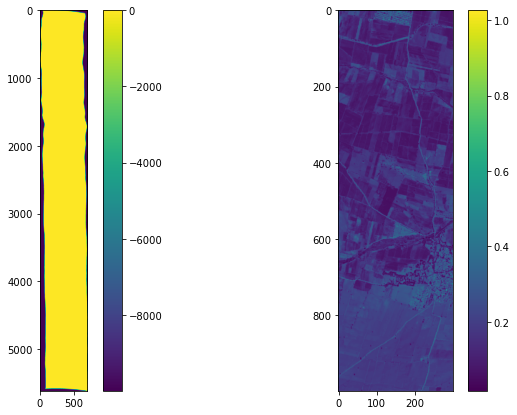

In [81]:
# Entire image at one wavelength
plt.subplot(121)
plt.rcParams["figure.figsize"]=(8,8)
plt.imshow(data[:,:,350])
plt.colorbar()
# Portion of the image at wavelength
plt.subplot(122)
plt.rcParams["figure.figsize"]=(8,8)
plt.imshow(data[2000:3000,100:400,350])
plt.colorbar()

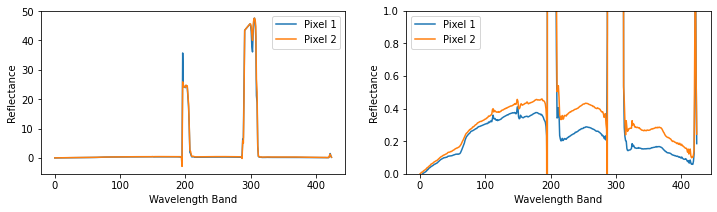

In [96]:
# Two different pixels
plt.subplot(121)
plt.rcParams["figure.figsize"]=(12,3)
plt.plot(data[1000,500,:], label = 'Pixel 1')
plt.plot(data[200,75,:], label = 'Pixel 2')
plt.ylabel('Reflectance')
plt.xlabel('Wavelength Band')
plt.legend()
# Zoomed in on plot
plt.subplot(122)
plt.rcParams["figure.figsize"]=(12,3)
plt.plot(data[1000,500,:], label = 'Pixel 1')
plt.plot(data[200,75,:], label = 'Pixel 2')
plt.ylim(0,1)
plt.ylabel('Reflectance')
plt.xlabel('Wavelength Band')
plt.legend()

Text(0.5, 0, 'Wavelength Band')

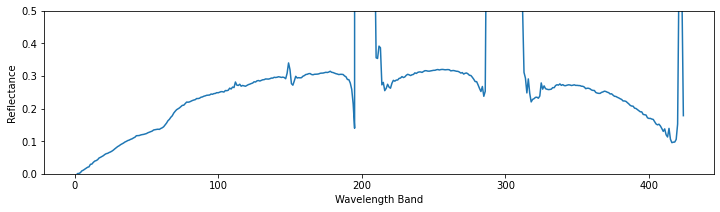

In [102]:
# Sample pixel for experiment
avirisng_input = data[200,500,:]
plt.plot(avirisng_input)
plt.ylim([0,0.5])
plt.ylabel('Reflectance')
plt.xlabel('Wavelength Band')

In [103]:
np.savetxt('avirisng_input.txt', avirisng_input)

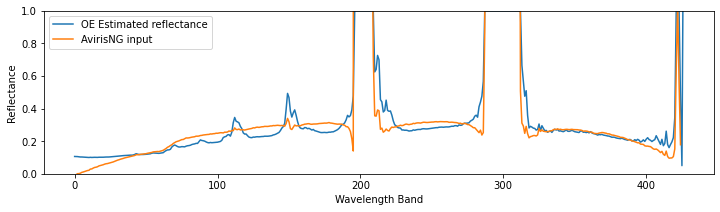

In [105]:
OE_estimated_reflectance = np.loadtxt('OE_reflectance_estimation.txt')
plt.plot(OE_estimated_reflectance, label = 'OE Estimated reflectance')
plt.plot(avirisng_input, label = 'AvirisNG input')
plt.ylim(0,1)
plt.xlabel('Wavelength Band')
plt.ylabel('Reflectance')
plt.legend()

Text(0.5, 0, 'Wavelength Band')

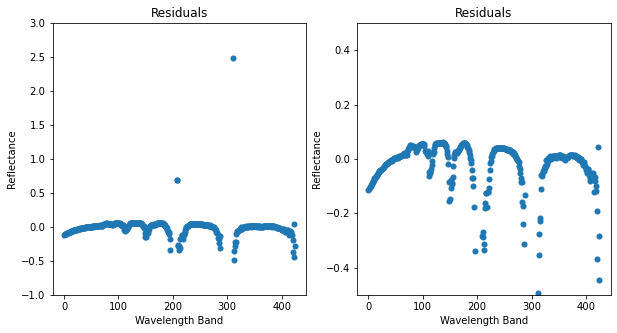

In [115]:
 # Statistics
errors = []
for i in range(statevec.size):
    diff = avirisng_input[i] - OE_estimated_reflectance[i]
    errors.append(diff)
    
bands = np.arange(425)
plt.subplot(121)
plt.rcParams["figure.figsize"]=(10,4)
plt.scatter(bands,errors, linewidths = 0.05)
plt.ylim(-1,3)
plt.title('Residuals')
plt.ylabel('Reflectance')
plt.xlabel('Wavelength Band')
# Zoomed in look
plt.subplot(122)
plt.rcParams["figure.figsize"]=(10,4)
plt.scatter(bands,errors, linewidths = 0.05)
plt.ylim(-0.5,0.5)
plt.title('Residuals')
plt.ylabel('Reflectance')
plt.xlabel('Wavelength Band')

In [116]:
deviations = []
for i in range(avirisng_input.size):
    diff = abs(avirisng_input[i] - OE_estimated_reflectance[i])
    deviations.append(diff)

av_deviation = sum(deviations) / len(deviations)
print('average deviation:', av_deviation)
# skewed by massive deviations
    

average deviation: 2.573643667278744
